#### Importing the dependencies and the packages

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

#### Data collection and preprocessing

In [4]:
house_price_dataset=sklearn.datasets.load_boston()

In [8]:
house_price_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
#loading dataset to pandas data frame
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [10]:
#add the target column to the data frame 
house_price_dataframe['price']=house_price_dataset.target

In [11]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#getting the rows and columns 
house_price_dataframe.shape


(506, 14)

In [14]:
house_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
#check for missing values 
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [16]:
#statistical measures of the data 
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Exploratory data analysis

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

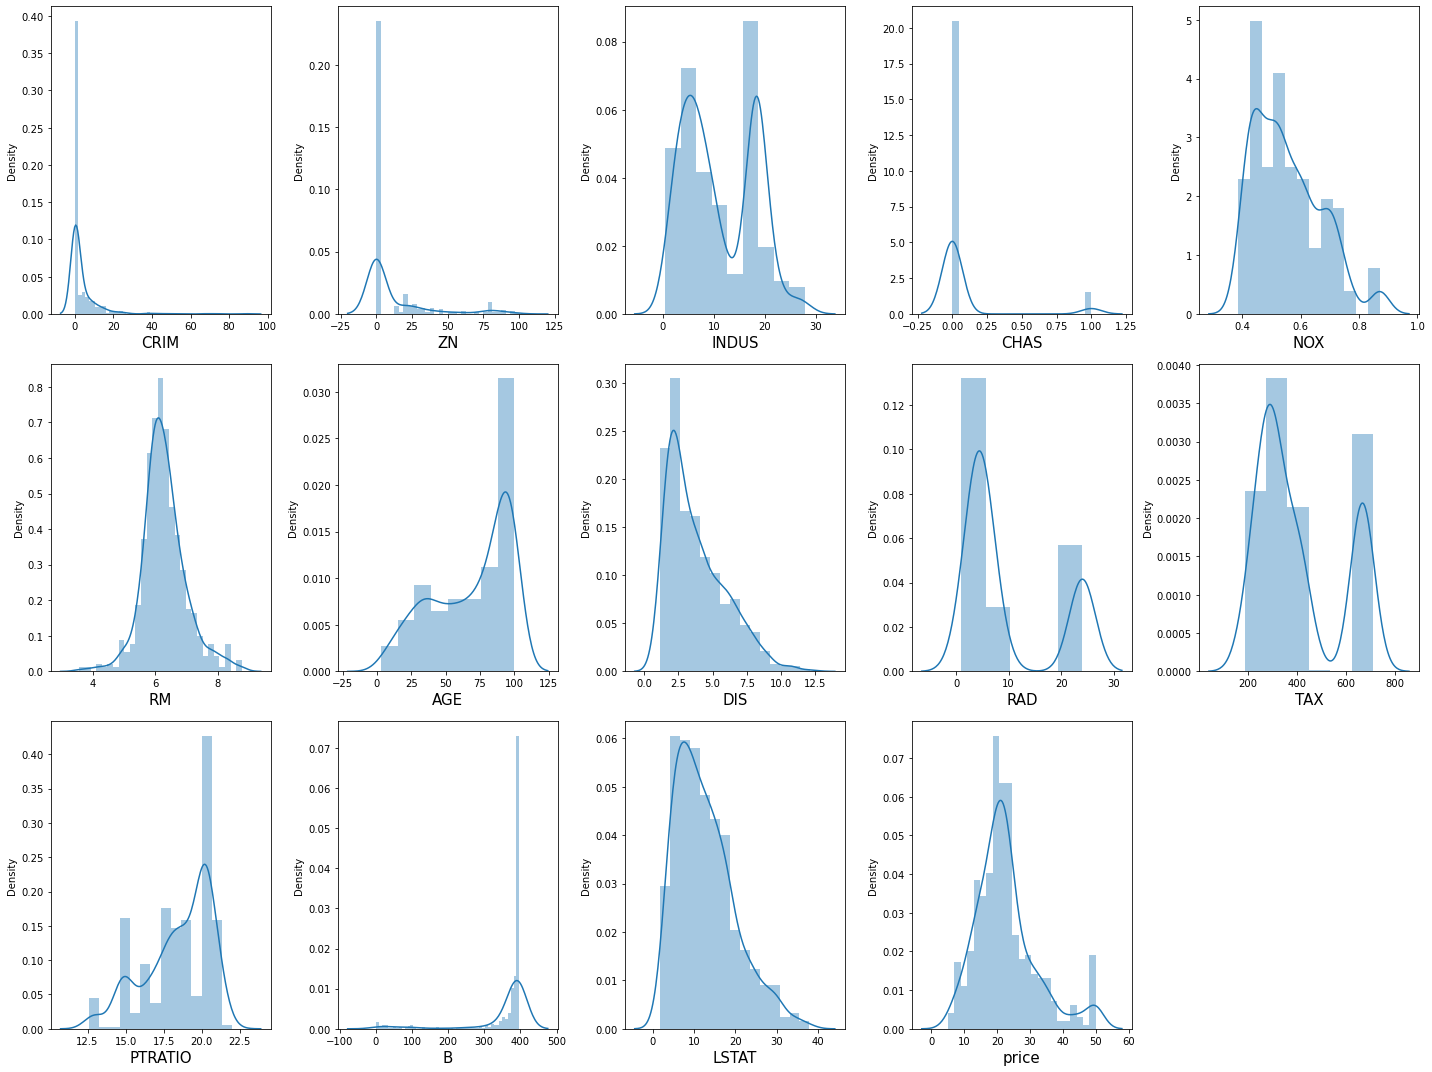

In [41]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in house_price_dataframe:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(house_price_dataframe[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

##### gettting the correlation between various features in the dataset
##### 1. positive corelation
##### 2. negative correlation

In [17]:
correlation = house_price_dataframe.corr()

<AxesSubplot:>

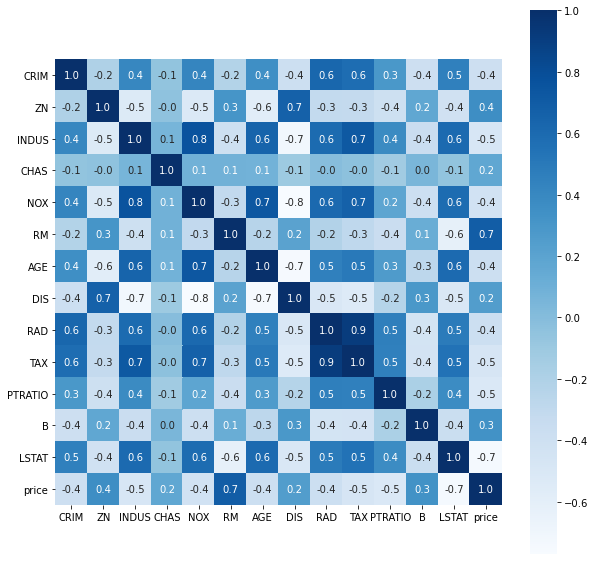

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

##### Splitting the data into features and target 

In [21]:
X= house_price_dataframe.drop(['price'],axis=1)
Y= house_price_dataframe['price']

###### Split the data into train and test data 

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


###### Model training 
###### XGBoost Regressor

In [27]:
#load the model 
xgBoostmodel=XGBRegressor()

In [28]:
#train the model
xgBoostmodel.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
#evaluation 
#prediction on the training data 

X_train_prediction=xgBoostmodel.predict(X_train)

In [30]:
print(X_train_prediction)

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.

In [33]:
# R square error 
score_1=metrics.r2_score(Y_train,X_train_prediction)

In [34]:
#mean absolute error 
score_2= metrics.mean_absolute_error(Y_train,X_train_prediction)

In [35]:
print(score_1,score_2)

0.9999948236320982 0.0145848437110976


In [36]:
#prediction on the testing data 

X_test_prediction=xgBoostmodel.predict(X_test)

In [37]:
testscore_1=metrics.r2_score(Y_test,X_test_prediction)
testscore_2= metrics.mean_absolute_error(Y_test,X_test_prediction)

In [38]:
print('Rsquard eror',testscore_1)
print('Mean absolute error',testscore_2)

Rsquard eror 0.8711660369151691
Mean absolute error 2.2834744154238233


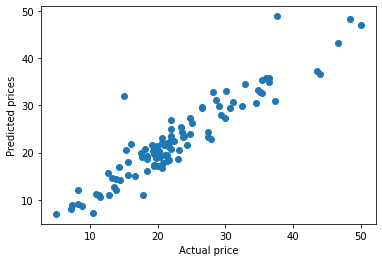

In [40]:
plt.scatter(Y_test,X_test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted prices')
plt.show()

###### Ridge Regression 

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, Y_test)))

Training set score: 0.73
Test set score: 0.77


In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, Y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, Y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.67
Test set score: 0.73
Number of features used: 10
